In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Pandas

Pandas is Python's answer to R.  It's a good tool for small(ish) data analysis -- i.e. when everything fits into memory.

The basic new "noun" in pandas is the **data frame**.

## Nouns (objects) in Pandas

### Data Frames

Like a table, with rows and columns (e.g. as in SQL).  Except:
  - The rows can be indexed by something interesting (there is special support for labels like categorical and timeseries data).  This is especially useful when you have timeseries data with potentially missing data points.
  - Cells can store Python objects. Like in SQL, columns are type homogeneous.
  - Instead of "NULL", the name for a non-existent value is "NA".  Unlike R, Python's data frames only support NAs in columns of some data types (basically: floating point numbers and 'objects') -- but this is mostly a non-issue (because it will "up-cast" integers to float64, etc.)
  
### Data Series:
These are named columns of a DataFrame (more correctly, a dataframe is a dictionary of Series).  The entries of the series have homogenous type.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# a data frame
df1 = pd.DataFrame({
    'number': [1, 2, 3],
    'animal': ['cat', 'dog', 'mouse']
})

# the same data frame
df2 = pd.DataFrame([
    ('cat', 1),
    ('dog', 2),
    ('mouse', 3),
], columns=['animal', 'number'])

assert(np.all(df1 == df2))

# a series
print df1['animal']
df2

0      cat
1      dog
2    mouse
Name: animal, dtype: object


,animal,number
0,cat,1
1,dog,2
2,mouse,3


## Verbs (operations) in Pandas
  
Pandas provides a "batteries-included" basic data analysis:
  - **Loading data:** `read_csv`, `read_table`, `read_sql`, and `read_html`
  - **Selection, filtering, and aggregation** (i.e. SQL-type operations): There's a special syntax for `SELECT`ing.  There's the `merge` method for `JOIN`ing.  There's also an easy syntax for what in SQL is a mouthful: Creating a new column whose value is computed from another column -- with the bonus that now the computations can use the full power of Python (though it might be faster if it didn't).
  - **"Pivot table" style aggregation:** If you're an Excel cognoscenti, you may appreciate this.
  - **NA handling:** Like R's data frames, there is good support for transforming NA values with default values / averaging tricks / etc.
  - **Basic statistics:** e.g. `mean`, `median`, `max`, `min`, and the convenient `describe`.
  - **Plugging into more advanced analytics:** Okay, this isn't batteries included.  But still, it plays reasonably with `sklearn`.
  - **Visualization:** For instance `plot` and `hist`.
  
We'll go through a little on all of these in the context of an example.  To go through it, you must have the (output) data files from the HMDA "Project structure" example.  We're going to explore a dataset of mortgage insurance issued by the Federal Housing Authority (FHA).  The data is broken down by census tract and tells us how big of a player the FHA is in each tract (how many homes etc.).

## Loading data (and basic statistics / visualization)

In [5]:
names =["State_Code", "County_Code", "Census_Tract_Number", "NUM_ALL", "NUM_FHA", "PCT_NUM_FHA", "AMT_ALL", "AMT_FHA", "PCT_AMT_FHA"]
df = pd.read_csv('small_data/fha_by_tract.csv', names=names)  ## Loading a CSV file, without a header (so we have to provide field names)

df['GEOID'] = df['Census_Tract_Number']*100 + 10**6 * df['County_Code'] \
    + 10**9 * df['State_Code']   ## A computed field!
    
df2 = df.sort('State_Code')  # sorting data to make it easier to read
df2.head()

/Users/ashkan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
23999,1.0,49.0,9613.0,16,4,25.0000,2184,799,36.58420,1.049961e+09
55215,1.0,3.0,102.0,8,1,12.5000,774,76,9.81912,1.003010e+09
65492,1.0,27.0,NaN,1,0,0.0000,82,0,0.00000,NaN
45193,1.0,95.0,311.0,20,3,15.0000,1495,263,17.59200,1.095031e+09
33750,1.0,39.0,9618.0,14,3,21.4286,1243,333,26.79000,1.039962e+09


In [6]:
## To drop a column

df.drop('GEOID', axis=1).head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0


Basic statistics and a histogram of the percentage of mortages
in each census tract insured by FHA
count    72035.000000
mean        29.703179
std         24.037779
min          0.000000
25%         10.780800
50%         24.753900
75%         44.207550
max        100.000000
Name: PCT_AMT_FHA, dtype: float64


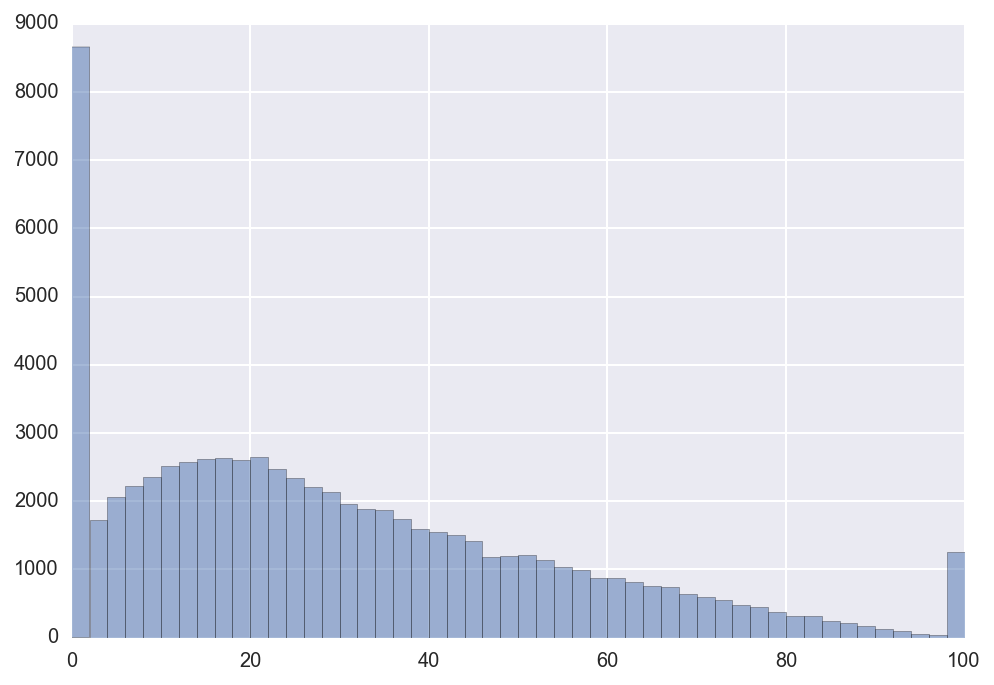

In [7]:
# Note how sample() is used to speed up plotting/processing by subsampling the rows of the dataframe.

print "Basic statistics and a histogram of the percentage of mortages"
print "in each census tract insured by FHA"
print df['PCT_AMT_FHA'].describe()
df['PCT_AMT_FHA'].hist(bins=50, alpha=0.5)

The above distribution looks a little skewed, let's look at it's log
We can save off the data into a new column
count    72035.000000
mean         8.170124
std          1.429644
min          1.098612
25%          7.347300
50%          8.335431
75%          9.176680
max         14.270319
Name: LOG_AMT_ALL, dtype: float64
We can use the apply function to transform data


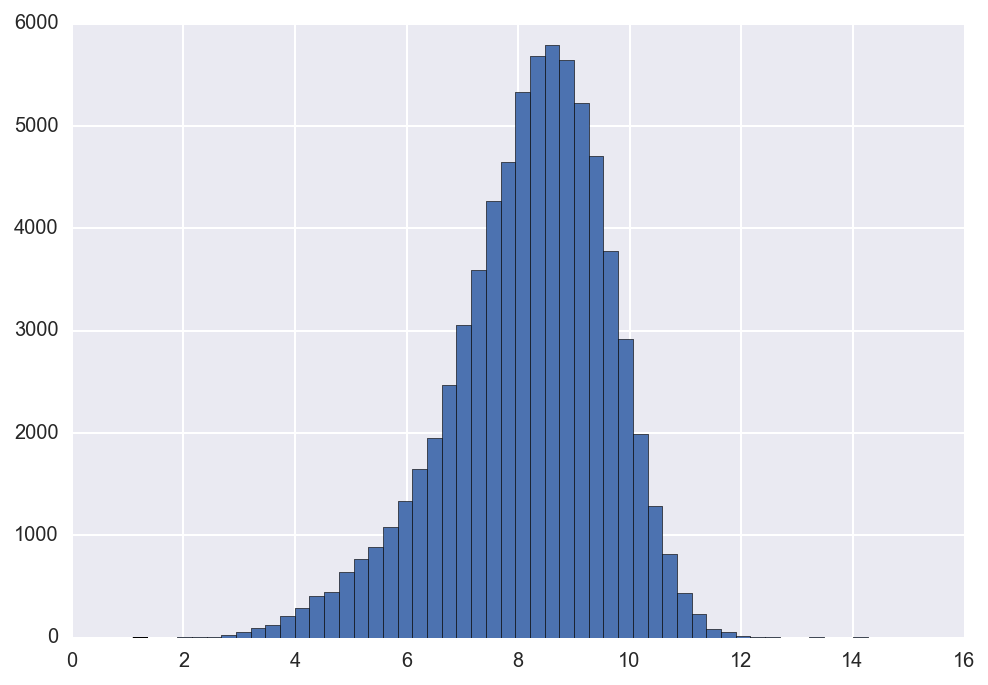

In [8]:
print "The above distribution looks a little skewed, let's look at it's log"
print "We can save off the data into a new column"
df['LOG_AMT_ALL'] = np.log1p(df['AMT_ALL'])
print df['LOG_AMT_ALL'].describe()

print "We can use the apply function to transform data"
df['AMT_ALL'].apply(np.log1p).hist(bins=50)

## Selecting data

There are 4 ways to select data.

In [9]:
df['New']=df['AMT_ALL'].apply(np.log1p)

In [8]:
print "Selecting off a column"
print df['State_Code'].head()
print
print "Selecting off multiple columns"
print df[['State_Code', 'County_Code']].head()
print
print "programatically access column names"
print all([col for col in df] == df.columns)

Selecting off a column
0     8.0
1    28.0
2    40.0
3    39.0
4    12.0
Name: State_Code, dtype: float64

Selecting off multiple columns
   State_Code  County_Code
0         8.0         75.0
1        28.0         49.0
2        40.0          3.0
3        39.0        113.0
4        12.0        105.0

programatically access column names
True


In [10]:
df_simple = df.dropna()

# to select both row and column, use `.loc`
print df_simple.loc[3, 'State_Code']

# to index columns by their integer position (instead of the label), use `.iloc`
print (df_simple.loc[:,'State_Code'] == df_simple.iloc[:,0]).all()

# .ix can do both label and position
print (df_simple.ix[:,'State_Code'] == df_simple.ix[:,0]).all()

39.0
True
True


## Filtering data

Now the `df[...]` notation is very flexible:
  - It accepts column names (strings and lists of strings);
  - It accepts column numbers (so long as there is no ambiguity with column names);
  - It accepts _binary data series!_
  
This means that you can write

        df[ df['column_name2']==MD & ( df['column_name1']==5 | df['column_name1']==6 ) ]
   
for what you would write in SQL as

>         SELECT * FROM df WHERE
            column_name2='MD" AND (column_name1=5 OR column_name1=6)

In [11]:
print "Selection returns a boolean array .."
print (df['State_Code'] == 1).head()
print
print "... we can apply the usual boolean operators to it"
print ((df['State_Code'] == 1) & (df['Census_Tract_Number'] == 9613)).head()
print
print "pandas indices take boolean lists of the appropriate length"
print df[df['State_Code'] == 5].head()
print
print "p.s. - numpy indices also take boolean arguments: here are some odd numbers"
print np.arange(10)[np.arange(10) % 2 == 1]
print

Selection returns a boolean array ..
0    False
1    False
2    False
3    False
4    False
Name: State_Code, dtype: bool

... we can apply the usual boolean operators to it
0    False
1    False
2    False
3    False
4    False
dtype: bool

pandas indices take boolean lists of the appropriate length
      State_Code  County_Code  Census_Tract_Number  NUM_ALL  NUM_FHA  \
77           5.0        119.0                32.05        1        1   
186          5.0         69.0                19.01        2        2   
904          5.0        119.0                12.00        2        2   
986          5.0        119.0                40.01        4        4   
1252         5.0        119.0                 5.00        5        4   

      PCT_NUM_FHA  AMT_ALL  AMT_FHA  PCT_AMT_FHA         GEOID  LOG_AMT_ALL  \
77          100.0      113      113     100.0000  5.119003e+09     4.736198   
186         100.0      224      224     100.0000  5.069002e+09     5.416100   
904         100.0      154  

**Note:** selecting rows by binary data series only if they share the same data index!

**Exercise:**
1. Plot the histogram of percentages for different states in the same graph to compare them.
2. Notice that there is a spike at 100%.  This means that the FHA has insured 100% of the houses in that census tract.  See what happens to the histogram when we restrict it to the case where the total number of loans is non-negligible.

## Joining data

The analogue of a

>             
    SELECT * 
        FROM df1
        INNER JOIN df2 
        ON df1.field_name=df2.field_name;

is

    df_joined = df1.merge(df2, on='field_name')

You can also do left / right / outer joins, mix-and-match column names, etc.  For that consult the Pandas documentation. (The example below will do a left join.)

Of course, just looking at the distribution of insurance by census tract isn't interesting unless we know more about the census tract.

In [12]:
# Loading information about census tracts
df_geo = pd.read_csv('small_data/2013_Gaz_tracts_national.tsv', sep='\t')

print "joining two dataframes"
df_joined = df.merge(df_geo, on='GEOID', how='left')
df_joined.sort('AMT_ALL', ascending=False).head()

joining two dataframes


/Users/ashkan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,New,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
40651,NaN,NaN,NaN,9477,1932,20.38620,1575871,331515,21.036900,NaN,14.270319,14.270319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50957,48.0,157.0,6731.01,2329,363,15.58610,578838,76312,13.183700,4.815767e+10,13.268780,13.268780,TX,50922560.0,384718.0,19.661,0.149,29.744280,-95.815507
53545,6.0,73.0,170.30,574,58,10.10450,284965,31840,11.173300,6.073017e+09,12.560125,12.560125,CA,33370884.0,1297044.0,12.885,0.501,33.036238,-117.126757
64093,6.0,75.0,615.00,357,4,1.12045,271648,2165,0.796987,6.075062e+09,12.512266,12.512266,CA,1669698.0,439050.0,0.645,0.170,37.787726,-122.392389
64137,6.0,59.0,626.43,130,2,1.53846,223532,1484,0.663887,6.059063e+09,12.317314,12.317314,CA,18821408.0,1549909.0,7.267,0.598,33.595088,-117.829038


## Aggregating data

The analog of SQL's `GROUP BY` is

    grouped = df.groupby(['field_name1', ...])...

The above is analogous to
>             
    SELECT mean(df.value1), std(df.value2) 
        FROM df
        GROUP BY df.field_name1, ...

Pandas is somewhat more flexible in how you can use grouping, not requiring you to specify an aggregation function up front.  A few examples are:


In [12]:
# This isn't a SQL-style 'GROUP BY'.
df_joined.groupby('USPS').first().head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,New,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
USPS,,,,,,,,,,,,,,,,,,
AK,2.0,50.0,3.00,1,1,100.0,121,121,100.0,2.050000e+09,4.804021,4.804021,4.930719e+10,625880372.0,19037.615,241.654,61.468804,-156.692206
AL,1.0,91.0,9733.00,1,1,100.0,214,214,100.0,1.091973e+09,5.370638,5.370638,4.900246e+08,2519385.0,189.200,0.973,32.084843,-87.945873
AR,5.0,119.0,32.05,1,1,100.0,113,113,100.0,5.119003e+09,4.736198,4.736198,5.016725e+06,194160.0,1.937,0.075,34.797202,-92.307637
AZ,4.0,27.0,3.01,2,2,100.0,156,156,100.0,4.027000e+09,5.056246,5.056246,3.372587e+06,174408.0,1.302,0.067,32.727057,-114.649322
CA,6.0,37.0,5023.02,5,5,100.0,1492,1492,100.0,6.037502e+09,7.308543,7.308543,7.505510e+05,0.0,0.290,0.000,33.966009,-118.068312


       AMT_FHA   AMT_ALL  NUM_FHA  NUM_ALL
USPS                                      
AK      438666   1880062     1850     7411
AL     1237209   5771053     9267    35766
AR      742675   3613515     5663    25500
AZ     3489785  13773032    22360    75226
CA    22607179  99817500    88650   307087


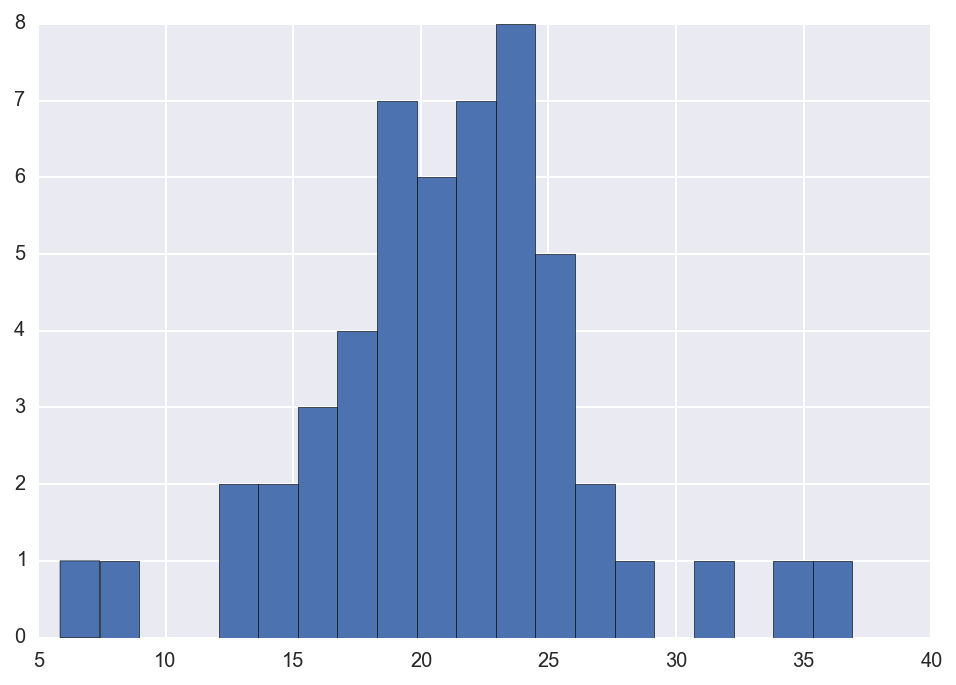

In [14]:
# This is the analog of
# SELECT USPS, SUM(AMT_FHA), SUM(AMT_ALL), ... FROM df GROUP BY USPS;
df_by_state = df_joined.groupby('USPS')['AMT_FHA', 'AMT_ALL', 'NUM_FHA', 'NUM_ALL'].sum()
print df_by_state.head()
df_by_state['PCT_AMT_FHA'] = 100.0 * df_by_state['AMT_FHA']  / df_by_state['AMT_ALL']
df_by_state['PCT_NUM_FHA'] = 100.0 * df_by_state['NUM_FHA']  / df_by_state['NUM_ALL']

# This sure looks different than the census-tract level histogram!
df_by_state['PCT_AMT_FHA'].hist(bins=20)

## Sorting by indices and columns

We can sort by the row (or coumn) index.

In [15]:
df_by_state.sort_index().head()

,AMT_FHA,AMT_ALL,NUM_FHA,NUM_ALL,PCT_AMT_FHA,PCT_NUM_FHA
USPS,,,,,,
AK,438666,1880062,1850,7411,23.332528,24.962893
AL,1237209,5771053,9267,35766,21.438185,25.910082
AR,742675,3613515,5663,25500,20.552703,22.207843
AZ,3489785,13773032,22360,75226,25.337812,29.723766
CA,22607179,99817500,88650,307087,22.648513,28.868041


We can also sort by the value in a column

In [16]:
df_by_state.sort('AMT_FHA', ascending=False).head()

/Users/ashkan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,AMT_FHA,AMT_ALL,NUM_FHA,NUM_ALL,PCT_AMT_FHA,PCT_NUM_FHA
USPS,,,,,,
CA,22607179,99817500,88650,307087,22.648513,28.868041
TX,10789870,45870174,73549,243977,23.522627,30.145874
FL,6866263,30754332,44511,157431,22.326165,28.273339
NY,5578590,30631391,25019,101335,18.212003,24.689397
VA,4713396,23048658,20495,85169,20.449763,24.063920


## Unique values

As in SQL, pandas can compute unique values, value counts, and test for membership

In [16]:
print "array of unique values"
print df['State_Code'].unique()[:10]
print
print "Value counts (as series)"
print df['State_Code'].value_counts().head()
print 
print "Test if numbers are small"
print df['State_Code'].isin(df['State_Code'].head(3)).head()

array of unique values
[  8.  28.  40.  39.  12.  36.  48.  13.  17.  34.]

Value counts (as series)
6.0     7872
48.0    5092
36.0    4629
12.0    4099
42.0    3184
Name: State_Code, dtype: int64

Test if numbers are small
0     True
1     True
2     True
3    False
4    False
Name: State_Code, dtype: bool


## Handling missing and NA data


When you read in a CSV file / SQL database there are often "NA" (or "null", "None", etc.) values.  The CSV reader has a special field for specifying how this is denoted, and SQL has the built-in notion of NULL.  Pandas provides some tools for working with these -- they are generally similar to (and a little bit worse than) `R`.

Note that these methods are by default not in place -- that is, they create a new series and do not change the original one.

For more details: http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [17]:
print df['GEOID'][:10]
print df['GEOID'].size

0             NaN
1    2.804901e+10
2             NaN
3    3.911306e+10
4    1.210501e+10
5    1.208698e+10
6    3.903512e+10
7    1.210302e+10
8    3.611900e+10
9             NaN
Name: GEOID, dtype: float64
72035


In [18]:
# isnull() / notnull() test for null-ness and return a Boolean series

df['GEOID'].isnull()[:10]

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: GEOID, dtype: bool

In [19]:
# dropna() removes the rows with null data

df['GEOID'].dropna().size

71040

In [20]:
# fillna() replaces N/A values with something else
# interpolate() replaces null values by (linear, or quadratic, or...) interpolation
# There is support for indexing by times (not necessarily equally spaced), etc. in the documentation.

df['fill_0'] = df['GEOID'].fillna(0)                        # Fills constant value, here 0
df['fill_forward'] = df['GEOID'].fillna(method='ffill')           # Fill forwards
df['fill_back'] = df['GEOID'].fillna(method='bfill', limit=5)  # Fill backwards, at most 5
df['fill_mean'] = df['GEOID'].fillna(df['GEOID'].mean())       # Fills constant value, here the mean (imputation)
df['fill_interp'] = df['GEOID'].interpolate()                    # Fills interpolated value
df[['fill_0', 'fill_forward', 'fill_back', 'fill_mean', 'fill_interp']][:10]

,fill_0,fill_forward,fill_back,fill_mean,fill_interp
0,0.000000e+00,NaN,2.804901e+10,2.837319e+10,NaN
1,2.804901e+10,2.804901e+10,2.804901e+10,2.804901e+10,2.804901e+10
2,0.000000e+00,2.804901e+10,3.911306e+10,2.837319e+10,3.358104e+10
3,3.911306e+10,3.911306e+10,3.911306e+10,3.911306e+10,3.911306e+10
4,1.210501e+10,1.210501e+10,1.210501e+10,1.210501e+10,1.210501e+10
5,1.208698e+10,1.208698e+10,1.208698e+10,1.208698e+10,1.208698e+10
6,3.903512e+10,3.903512e+10,3.903512e+10,3.903512e+10,3.903512e+10
7,1.210302e+10,1.210302e+10,1.210302e+10,1.210302e+10,1.210302e+10
8,3.611900e+10,3.611900e+10,3.611900e+10,3.611900e+10,3.611900e+10
9,0.000000e+00,3.611900e+10,4.811301e+10,2.837319e+10,4.211601e+10


### Note
N/A values are (usually) smartly ignored when performing other calculations on dataframes. For example, when using string methods on series:

In [21]:
text_series = df['PCT_NUM_FHA'].replace(0, np.nan).apply(str)
print text_series[:10]

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
5    100.0
6    100.0
7    100.0
8    100.0
9    100.0
Name: PCT_NUM_FHA, dtype: object


In [22]:
text_series[:10].str.split('.')

0    [100, 0]
1    [100, 0]
2    [100, 0]
3    [100, 0]
4    [100, 0]
5    [100, 0]
6    [100, 0]
7    [100, 0]
8    [100, 0]
9    [100, 0]
Name: PCT_NUM_FHA, dtype: object

## Manipulating strings

In [23]:
states = df_joined['USPS'].dropna()
states[states.str.contains('A')].head()

12    GA
20    GA
23    LA
26    AZ
27    GA
Name: USPS, dtype: object

## Indices in Pandas

Pandas indices is a powerful mechanism that allow us to handle data naturally.

In [17]:
# pandas will associate elements based on the index, not the ordering
s1 = pd.Series([1,2,3], index=['a', 'b', 'c'])
s2 = pd.Series([3,2,1], index=['c', 'b', 'a'])
assert(np.all(s1 + s2 == 2 * s1))

# pandas can also handle missing indices by inserting `NaN`
s3 = pd.Series([3,2,1], index=['c', 'd', 'e'])
print s1 + s3
print

# pandas also supports arithmetic operations assuming input fill values
print s1.add(s3, fill_value=0)

a    NaN
b    NaN
c    6.0
d    NaN
e    NaN
dtype: float64

a    1.0
b    2.0
c    6.0
d    2.0
e    1.0
dtype: float64


## Function application and mapping

For element-wise function application, the most straightforward thing to do is to apply numpy functions to these objects

In [25]:
df1 = pd.DataFrame(np.arange(24).reshape(4,6))
np.sin(df1)

,0,1,2,3,4,5
0,0.000000,0.841471,0.909297,0.141120,-0.756802,-0.958924
1,-0.279415,0.656987,0.989358,0.412118,-0.544021,-0.999990
2,-0.536573,0.420167,0.990607,0.650288,-0.287903,-0.961397
3,-0.750987,0.149877,0.912945,0.836656,-0.008851,-0.846220


However, sometimes you want to compute things column-wise or row-wise.  In this case, you will need to use the `apply` method.  For example, the following takes the range of each row

In [18]:
df2 = pd.DataFrame(np.arange(24).reshape(4,6))

print "Range of each column"
print df2.apply(lambda x: x.max() - x.min())
print
print "Range of each row"
print df2.apply(lambda x: x.max() - x.min(), axis=1)
print df2
print df2.apply(lambda x: 2*x, axis=1)

Range of each column
0    18
1    18
2    18
3    18
4    18
5    18
dtype: int64

Range of each row
0    5
1    5
2    5
3    5
dtype: int64
    0   1   2   3   4   5
0   0   1   2   3   4   5
1   6   7   8   9  10  11
2  12  13  14  15  16  17
3  18  19  20  21  22  23
    0   1   2   3   4   5
0   0   2   4   6   8  10
1  12  14  16  18  20  22
2  24  26  28  30  32  34
3  36  38  40  42  44  46


Finally, we can apply more complex pure-python functions elementwise using the `applymap` method

In [20]:
df3 = pd.DataFrame(np.arange(24).reshape(4,6))
df3.applymap(lambda x: "%.3f" % x)

,0,1,2,3,4,5
0,0.000,1.000,2.000,3.000,4.000,5.000
1,6.000,7.000,8.000,9.000,10.000,11.000
2,12.000,13.000,14.000,15.000,16.000,17.000
3,18.000,19.000,20.000,21.000,22.000,23.000


### Pandas HTML data import example

Pandas takes a "batteries included" approach and throws in a whole lot of convenience functions.  For instance it has import functions for a variety of formats.  One of the pleasant surprises is a command `read_html` that's meant to automate the process of extracting tabular data from HTML.  In particular, it works pretty well with tables on Wikipedia.  

Let's do an example: We'll try to extract the list of the world's tallest buildings from
http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world


(This example will, likely, not get lecture time.)

In [21]:
dfs = pd.read_html('http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world', header=0, parse_dates=False)

# There are several tables on the page.  By inspection we can figure out which one we want
tallest = dfs[2]

# The coordinates column needs to be fixed up.  This is a bit of string parsing:
def clean_lat_long(s):
    try:
        parts = s.split("/")
    except AttributeError:
        return (None, None)
    if len(parts)<3:
        return (None, None)
    m=re.search(r"(\d+[.]\d+);[^\d]*(\d+[.]\d+)[^\d]", parts[2])
    if not m:
        return (None, None)
    return (m.group(1), m.group(2))

tallest['Clean_Coordinates'] = tallest['Coordinates'].apply(clean_lat_long)
tallest['Latitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[0])
tallest['Longitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[1])

# Et voila
tallest.head()

AttributeError: 'module' object has no attribute '_base'

In [30]:
tallest.info()

NameError: name 'tallest' is not defined

### Some remarks
Unfortunately, that didn't work well on height (ft) and is so-so on year built.  

In both cases, it is because it is assuming that the field is a _date_ rather than just a number.  We can hint these things to `read_html` through extra parameters.

In this particular case we would probably not bother: It is pretty good on the year built, and height in meters is good enough.

**Exercise**

1. Parse the height correctly.
1. Parse the table rankings of [UK universities available on Wikipedia](https://en.wikipedia.org/wiki/Rankings_of_universities_in_the_United_Kingdom):

## "Pivot table" syntax, stacking and unstacking

These are useful tools -- and if you're already familiar with Pivot Tables in Excel, for example, they'll be familiar. See http://pandas.pydata.org/pandas-docs/stable/reshaping.html for more information.

In general pivot tables are useful when you want to look at aggregations but change what the dependent and independent variables are.

In [27]:
# create a pivot table from a dataframe

pt = pd.pivot_table(df, index='State_Code', values=['NUM_ALL', 'NUM_FHA'], aggfunc=np.sum)
pt.head()

,NUM_ALL,NUM_FHA
State_Code,,
1.0,35833,9269
2.0,7414,1850
4.0,75730,22533
5.0,25531,5665
6.0,307482,88745


The stack() and unstack() methods are used to manage MultiIndexes, and can control whether you have a row MultiIndex, a column MultiIndex, or neither:

In [28]:
grouped = df[['State_Code', 'County_Code', 'NUM_ALL', 'NUM_FHA']].groupby(['State_Code', 'County_Code']).mean()
grouped.head()

NUM_ALL    NUM_FHA
State_Code County_Code                      
1.0        1.0          38.833333  12.250000
           3.0          80.156250  13.031250
           5.0           5.777778   0.888889
           7.0          17.000000   5.000000
           9.0          39.111111  10.777778

In [29]:
grouped.unstack().head()

NUM_ALL                                                    \
County_Code      1.0        3.0        5.0   6.0        7.0        9.0     
State_Code                                                                 
1.0          38.833333  80.156250   5.777778   NaN  17.000000  39.111111   
2.0                NaN        NaN        NaN   NaN        NaN        NaN   
4.0          18.200000  29.233333  50.434783   NaN  32.000000  27.555556   
5.0          14.625000   7.571429  39.777778   NaN  74.183673  38.875000   
6.0          38.284507  17.000000  45.333333   NaN  31.326923  55.545455   

                                                   ...  NUM_FHA              \
County_Code      11.0      12.0       13.0  14.0   ...    750.0 760.0 770.0   
State_Code                                         ...                        
1.0           3.000000       NaN   7.111111   NaN  ...      NaN   NaN   NaN   
2.0                NaN       NaN   1.000000   NaN  ...      NaN   NaN   NaN   
4.0           2.666667  5.428571  56.679820   NaN  ...      NaN   NaN   NaN   
5.0           3.400000       NaN  14.500000   NaN  ...      NaN   NaN   NaN   
6.0          22.500000       NaN  57.845411   NaN  ...      NaN   NaN   NaN   

                                                       
County_Code 775.0 790.0 800.0 810.0 820.0 830.0 840.0  
State_Code                                             
1.0           NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2.0           NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4.0           NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5.0           NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6.0           NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 646 columns]

In [36]:
unstacked = grouped.unstack(level=['County_Code', 'State_Code'])
print unstacked.head()
#print unstacked

         County_Code  State_Code
NUM_ALL  1.0          1.0           38.833333
         3.0          1.0           80.156250
         5.0          1.0            5.777778
         7.0          1.0           17.000000
         9.0          1.0           39.111111
dtype: float64


## Plugging into more advanced analytics

Almost any "advanced analytics" tool in the Python ecosystem is going to take as input `np.array` type arrays.  You can access the underlying array of a data frame column as

        df['column'].values
        
Many of them take `nd.array` whose underlying data can be accessed by 

        df.values
        
directly.  *Most* of the time, they will take `df['column']` and `df` without needing to look at values.

This is particularly important if you want to use Pandas with the sklearn library. See this [blog post](http://www.markhneedham.com/blog/2013/11/09/python-making-scikit-learn-and-pandas-play-nice/) for an example.

### Exit Tickets
1. Describe several situations where you would prefer to use Pandas, and several where you'd prefer SQL.
1. Write the syntax for slicing the rows of a dataframe according to a filtering criterion.
1. Write the syntax for selecting, adding, or removing columns of a dataframe.

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*